In [1]:
from scipy.signal import savgol_filter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



def snv(input_data):
    
    
    # Define a new array and populate it with the corrected data  
    output_data = np.zeros_like(input_data)
    for i in range(input_data.shape[0]):
        # Apply correction
        output_data[i,:] = (input_data[i,:] - np.mean(input_data[i,:])) / np.std(input_data[i,:])
    return output_data

## Settings for the smooth derivatives using a Savitsky-Golay filter
w = 13 ## Sav.Gol window size
p = 2  ## Sav.Gol polynomial degree

In [2]:
# Weeds Spectral CSV Files
kochia = '/Users/billygrahamram/Documents/Envs-Codes/usefulCodes/opensourcedata/spectra/point_kochia_1.csv'
ragweed = '/Users/billygrahamram/Documents/Envs-Codes/usefulCodes/opensourcedata/spectra/point_ragweed_1.csv'
waterhemp = '/Users/billygrahamram/Documents/Envs-Codes/usefulCodes/opensourcedata/spectra/point_waterhemp_1.csv'
redroot_pigweed = '/Users/billygrahamram/Documents/Envs-Codes/usefulCodes/opensourcedata/spectra/point_redroot_pigweed_1.csv'

# Crops Spectral CSV Files
canola = '/Users/billygrahamram/Documents/Envs-Codes/usefulCodes/opensourcedata/spectra/point_canola_1.csv'
soybean = '/Users/billygrahamram/Documents/Envs-Codes/usefulCodes/opensourcedata/spectra/point_soybean_1.csv'
sugarbeet = '/Users/billygrahamram/Documents/Envs-Codes/usefulCodes/opensourcedata/spectra/point_sugarbeet_1.csv'

In [3]:
# Create a dictionary of file paths and labels
file_paths = {
    'kochia': kochia,
    'ragweed': ragweed,
    'waterhemp': waterhemp,
    'redroot_pigweed': redroot_pigweed,
    'canola': canola,
    'soybean': soybean,
    'sugarbeet': sugarbeet
}

# Initialize an empty list to store numpy arrays
arrays = []

# Loop through the dictionary items
for label, path in file_paths.items():
    # Read each CSV file into a DataFrame
    df = pd.read_csv(path)
    # Add a 'label' column
    df['label'] = label
    # Convert the DataFrame to a numpy array and append it to the list
    arrays.append(df.values)

# Concatenate all numpy arrays in the list
array_concat = np.concatenate(arrays)


# Assuming that 'label' is the last column in your array
X = array_concat[:, :-1]  # all columns except the last one
labels = array_concat[:, -1]  # only the last column



In [4]:
raw_data = X
snv_data = snv(X)
SG_firstDeriv = savgol_filter(X, w, polyorder = p, deriv=1)
SG_secondDeriv = savgol_filter(X, w, polyorder = p, deriv=2)
snv_SG_1 = savgol_filter(snv(X), w, polyorder = p, deriv=1)
snv_SG_2 = savgol_filter(snv(X), w, polyorder = p, deriv=2)

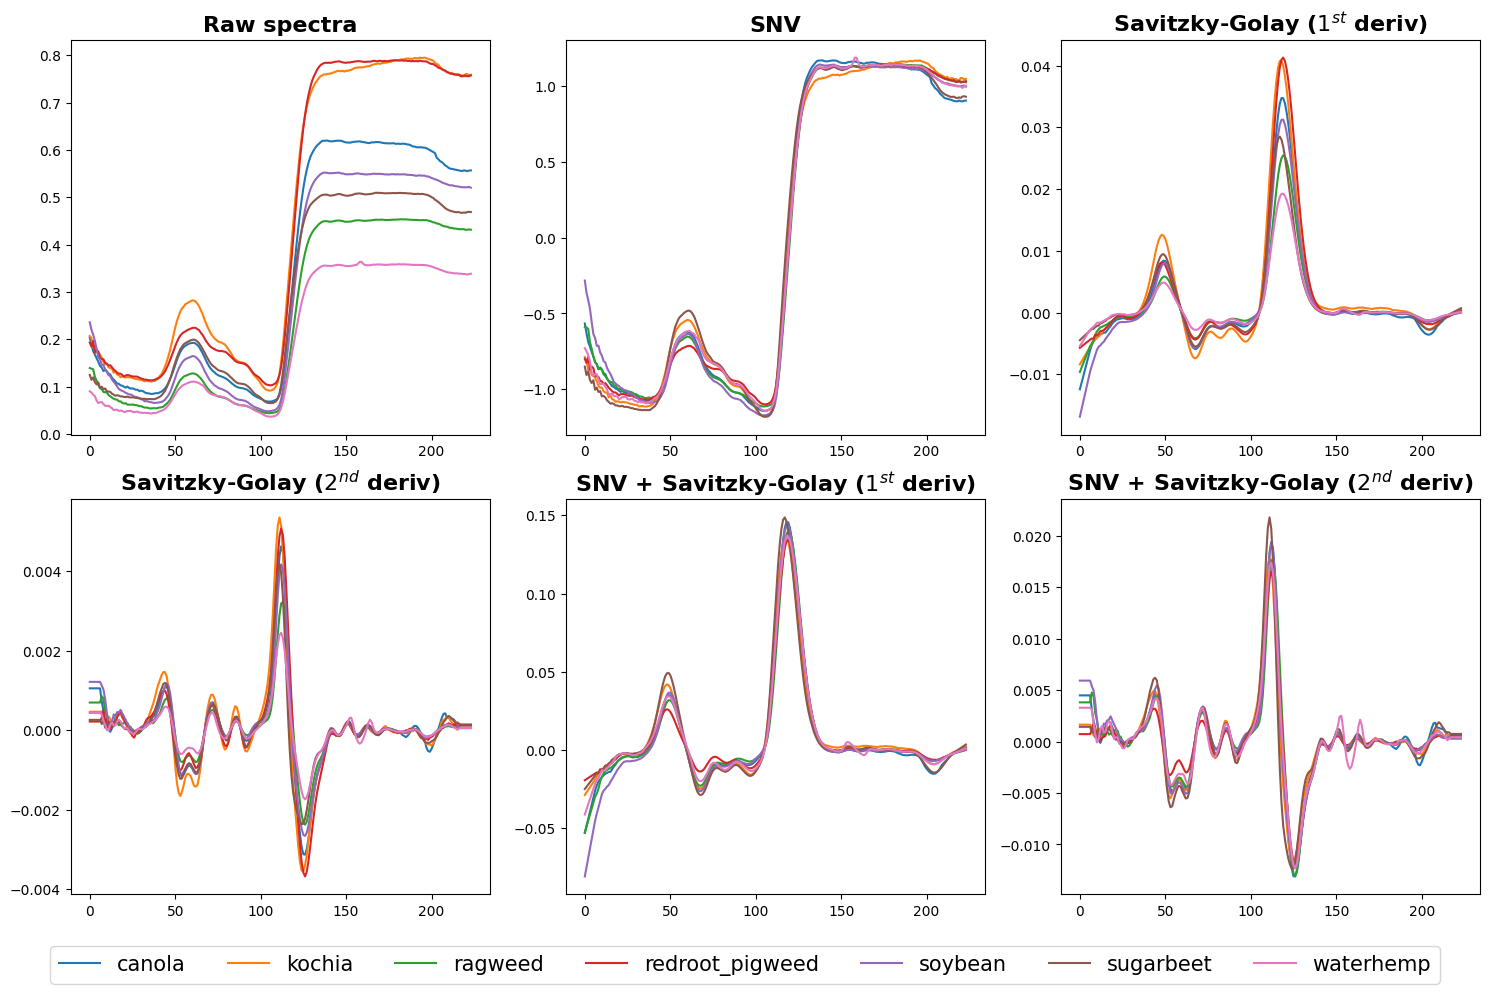

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Assuming that each of your preprocessed signals is a 2D numpy array
# where rows represent different signals and columns represent time-series data of each signal.
# And 'labels' is a 1D numpy array containing the class labels for each signal.

titles = ['Raw spectra', 'SNV', 'Savitzky-Golay ($1^{st}$ deriv)', 'Savitzky-Golay ($2^{nd}$ deriv)', 'SNV + Savitzky-Golay ($1^{st}$ deriv)', 'SNV + Savitzky-Golay ($2^{nd}$ deriv)']

# List of your preprocessed signals
signals = [raw_data, snv_data, SG_firstDeriv, SG_secondDeriv, snv_SG_1, snv_SG_2]

# Get the unique class labels
classes = np.unique(labels)

# Create a figure with 2 rows and 3 columns
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the axes array
axs = axs.ravel()

# Create a list to store the legend handles
legend_handles = []

# Loop through each signal and plot the mean of each class's signals
for i, signal in enumerate(signals):
    for j, cls in enumerate(classes):
        
        # Get the signals for this class
        class_signals = signal[labels == cls]
        # Calculate the mean of this class's signals
        mean_signal = np.mean(class_signals, axis=0)
        # Plot the mean signal and get the line object
        line, = axs[i].plot(mean_signal)
        # If this is the first signal, add the line object to the legend handles
        if i == 0:
            legend_handles.append(line)
    axs[i].set_title(titles[i], fontsize=16, weight='bold')

# Create the legend labels
legend_labels = [f'{cls}' for cls in classes]

# Add a single legend for the entire figure
fig.legend(legend_handles, legend_labels, loc='lower center', ncol=len(classes), fontsize= 15)

# Show the plot
plt.tight_layout()
plt.subplots_adjust(bottom=0.1)  # Adjust the bottom margin to make room for the legend
plt.savefig('/Users/billygrahamram/Documents/Envs-Codes/usefulCodes/opensourcedata/preprocessed.png', dpi=300)
plt.show()
